In [1]:
%matplotlib inline
import os
import sys
AbsPath = os.path.abspath("")
sys.path.append(AbsPath+"/../..")
import numpy as np
from Functions import Functions as F
from copy import copy
import matplotlib as mpl
import matplotlib.pyplot as plt
from colossus.cosmology import cosmology
import hmf
from itertools import cycle
cosmology.setCosmology("planck15")
Cosmo = cosmology.getCurrent()
h = Cosmo.h
#set plot paramaters here
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update({'font.size': 15})
mpl.rcParams.update({'lines.linewidth': 2})
mpl.rcParams.update({'lines.markersize': 5})

/home/pg1g15/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [10]:
#Abundance Matching Parameters
Override =\
{\
'M10':11.95,\
'SHMnorm10':0.03,\
'beta10':1.6,\
'gamma10':0.7,\
'M11':0.5,\
'SHMnorm11':-0.01,\
'beta11':-0.6,\
'gamma11':0.1\
}

AbnMtch =\
{\
'Behroozi13': False,\
'Behroozi18': False,\
'B18c':False,\
'B18t':False,\
'G18':True,\
'G18_notSE':False,\
'Lorenzo18':False,\
'Moster': False,\
'z_Evo':True,\
'Scatter': 0.11,\
'Override_0': False,\
'Override_z': False,\
'Override': Override,\
'PFT': False,\
'M_PFT1': False,\
'M_PFT2': False,\
'M_PFT3': False,\
'N_PFT1': False,\
'N_PFT2': False,\
'N_PFT3': False,\
'b_PFT1': False,\
'b_PFT2': False,\
'b_PFT3': False,\
'g_PFT1': False,\
'g_PFT2': False,\
'g_PFT3': False\
}

Paramaters = \
{\
'AbnMtch' : AbnMtch,\
'AltDynamicalTime': 1,\
'NormRnd': 0.5,\
'ContinuityEqn': True\
}


#Subhalomass function parameters macc/M0
Unevolved = {\
'gamma' : 0.22,\
'alpha' : -0.91,\
'beta' : 6,\
'omega' : 3,\
'a' : 1,\
}

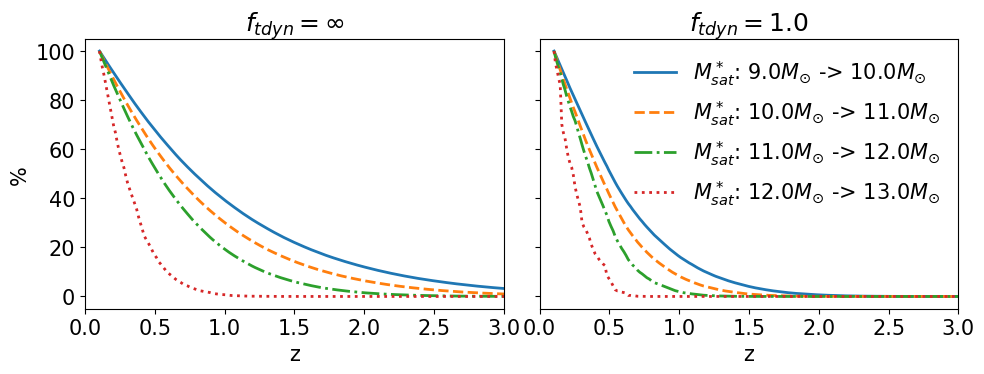

In [3]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update({'font.size': 15})
mpl.rcParams.update({'lines.linewidth': 2})
mpl.rcParams.update({'lines.markersize': 5})
lines = ["-", "--","-.", ":"]
linecycler = cycle(lines)


SM, z, z_infall = F.LoadData_z_infall((np.inf, False, False, True))
SM_bin = 0.1
z_bin = 0.01

f, SubPlots = plt.subplots(1, 2, figsize = (10,4), sharey = True)

MR_bin = 1.0
MassRanges = np.arange(9, 11.5+MR_bin, MR_bin)
for j in MassRanges:
    linestyle = next(linecycler)
    Bin_l, Bin_u = np.digitize(j, bins = SM), np.digitize(j+MR_bin, bins = SM)
    Sum_by_z = np.array([np.sum(i[Bin_l:Bin_u]) for i in z_infall])
    Total = np.sum(Sum_by_z)
    SubPlots[0].plot(z, (np.flip(np.cumsum(np.flip(Sum_by_z, 0)), 0)/Total*100), linestyle, label = "$M_{sat}^*$:"+" {}".format(j)+"$M_{\odot}$ -> "+"{}".format(j+MR_bin)+"$M_{\odot}$")

SubPlots[0].set_title("$f_{tdyn} = \infty$")
SubPlots[0].set_xlabel("z")
SubPlots[0].set_ylabel("%")
#SubPlots[0].legend()


SM, z, z_infall = F.LoadData_z_infall((1.0, False, False, True, True, 'G18'))
SM_bin = 0.1
z_bin = 0.01

MR_bin = 1.0
MassRanges = np.arange(9, 11.5+MR_bin, MR_bin)
for j in MassRanges:
    linestyle = next(linecycler)
    Bin_l, Bin_u = np.digitize(j, bins = SM), np.digitize(j+MR_bin, bins = SM)
    Sum_by_z = np.array([np.sum(i[Bin_l:Bin_u]) for i in z_infall])
    Total = np.sum(Sum_by_z)
    SubPlots[1].plot(z, (np.flip(np.cumsum(np.flip(Sum_by_z, 0)), 0)/Total*100), linestyle,label = "$M_{sat}^*$:"+" {}".format(j)+"$M_{\odot}$ -> "+"{}".format(j+MR_bin)+"$M_{\odot}$")

SubPlots[1].set_title("$f_{tdyn} = 1.0$")
SubPlots[1].set_xlabel("z")
SubPlots[1].legend(frameon = False)

SubPlots[0].set_xlim(0,3)
SubPlots[1].set_xlim(0,3)
plt.tight_layout()
plt.savefig("./Figures_For_Paper_Final/Fig3.pdf")
plt.savefig("./Figures_For_Paper_Final/Fig3.png")
plt.savefig("./Figures_For_Paper_Final/Fig3.eps")


plt.show() 

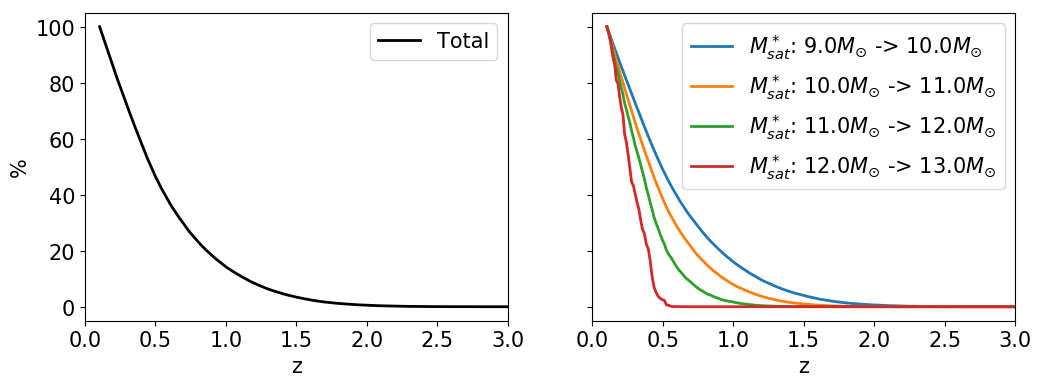

In [4]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update({'font.size': 15})
mpl.rcParams.update({'lines.linewidth': 2})
mpl.rcParams.update({'lines.markersize': 5})
SM, z, z_infall = F.LoadData_z_infall((1.0, False, False, True))
SM_bin = 0.1
z_bin = 0.01

f, SubPlots = plt.subplots(1, 2, figsize = (12,4), sharey = True)

Sum_by_z = np.array([np.sum(i) for i in z_infall])
Total = np.sum(Sum_by_z)
SubPlots[0].plot(z, (np.flip(np.cumsum(np.flip(Sum_by_z, 0)), 0)/Total*100), "k", label = "Total")
SubPlots[0].set_xlabel("z")
SubPlots[0].legend()


MR_bin = 1.0
MassRanges = np.arange(9, 12.0+MR_bin, MR_bin)
for j in MassRanges:
    Bin_l, Bin_u = np.digitize(j, bins = SM), np.digitize(j+MR_bin, bins = SM)
    Sum_by_z = np.array([np.sum(i[Bin_l:Bin_u]) for i in z_infall])
    Total = np.sum(Sum_by_z)
    plt.plot(z, (np.flip(np.cumsum(np.flip(Sum_by_z, 0)), 0)/Total*100), label = "$M_{sat}^*$:"+" {}".format(j)+"$M_{\odot}$ -> "+"{}".format(j+MR_bin)+"$M_{\odot}$")

SubPlots[1].set_xlabel("z")
SubPlots[0].set_ylabel("%")
SubPlots[1].legend()

SubPlots[0].set_xlim(0,3)
SubPlots[1].set_xlim(0,3)
plt.savefig("./Figures_For_Paper_Final/Acreeted_At_tot.pdf")
plt.savefig("./Figures_For_Paper_Final/Acreeted_At_tot.png")

plt.show() 

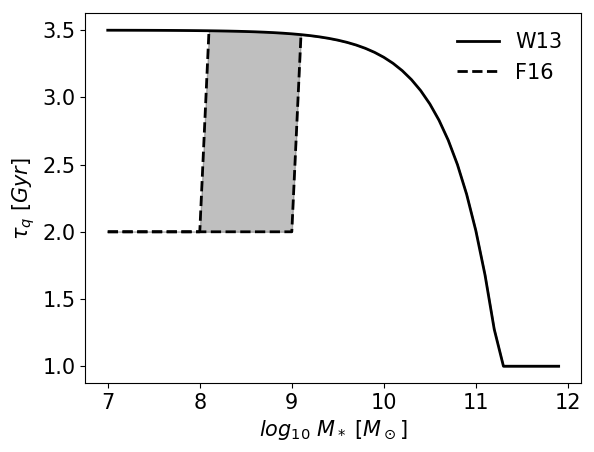

In [5]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update({'font.size': 15})
mpl.rcParams.update({'lines.linewidth': 2})
mpl.rcParams.update({'lines.markersize': 5})
SF_Q_Options = [1,2,3]
z_infall = 0.5
SM_Sat = np.arange(7, 12, 0.1)
for SF_Q in SF_Q_Options:
    #Moster17
    if np.any(SF_Q == np.array([1])):
        Tdyn = F.DynamicalTime_Fun(z_infall)
        Tau_d = Tdyn*4.282*np.power(10, -0.363*(SM_Sat - 10))
        Tau_d[Tau_d < Tdyn*4.282] = Tdyn*4.282
        Tau_f = np.full_like(SM_Sat, 0.5)
        #plt.plot(SM_Sat, Tau_d, "M")
        #print("Moster", Factor_Stripping_SF, Paramaters['SF_Q'])
    elif np.any(SF_Q == np.array([2])): #Wetzel 13
        Tau_f = -0.5*SM_Sat + 5.7
        Tau_f[Tau_f <= 0.2] = 0.2 # Fadetime
        Tau_d = 3.5 - (np.exp( (SM_Sat - 10.8)*2 ))
        Tau_d[Tau_d <= 1.0] = 1.0
        plt.plot(SM_Sat, Tau_d, "k",label = "W13")
    elif np.any(SF_Q == np.array([3])): #Fillingham 16 #Host Dep

        Tau_f = -0.5*SM_Sat + 5.7
        Tau_f[Tau_f <= 0.2] = 0.2 # Fadetime
        Tau_d = 3.5 - (np.exp( (SM_Sat - 10.8)*2 ))
        Tau_d[Tau_d <= 1.0] = 1.0   
        Tau_d_10 = copy(Tau_d)
        Tau_d_15 = copy(Tau_d)
        Host_Dep = (10-15)/5
        Tau_d_10[SM_Sat < 9+Host_Dep] = 2.0 #Tau_d[np.digitize(9, SM_Sat)] + 1.25*(SM_Sat[SM_Sat < 9] - (10-Correction))
        plt.plot(SM_Sat[:np.digitize(9+Host_Dep, SM_Sat)+1], Tau_d_10[:np.digitize(9+Host_Dep, SM_Sat)+1], "k--")
        Host_Dep = (15 - 15)/5
        Tau_d_15[SM_Sat < 9+Host_Dep] = 2.0
        Tau_d[Tau_d < 1.0] = 1.0
        plt.fill_between(SM_Sat, Tau_d_10, Tau_d_15, interpolate = True, color = "k", alpha = 0.25)
        
        plt.plot(SM_Sat[:np.digitize(9+Host_Dep, SM_Sat)+1], Tau_d_15[:np.digitize(9+Host_Dep, SM_Sat)+1], "k--", label = "F16")
    else:
        Tau = np.full_like(SM_Sat, 3.0) #Quenchtime is always X gyr
        Tau_f = np.full_like(SM_Sat, 0.5)
        #T_quench = np.full_like(SM_Sat,-1) #so it never triggers
#plt.ylim(0,5)
plt.legend(frameon = False)
plt.ylabel(r"$\tau_{q}$ $[Gyr]$")
plt.xlabel("$log_{10}$ $M_*$ $[M_\odot]$")
plt.savefig("./Figures_For_Paper_Final/Quenchtime.png")
plt.savefig("./Figures_For_Paper_Final/Quenchtime.pdf")
plt.show()

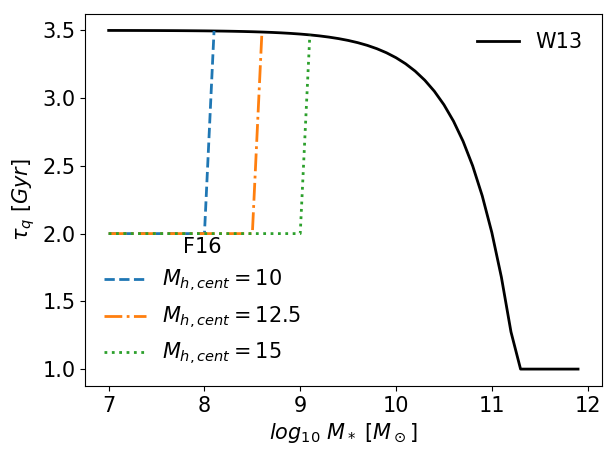

In [6]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update({'font.size': 15})
mpl.rcParams.update({'lines.linewidth': 2})
mpl.rcParams.update({'lines.markersize': 5})
SF_Q_Options = [1,2,3]
z_infall = 0.5
SM_Sat = np.arange(7, 12, 0.1)
for SF_Q in SF_Q_Options:
    #Moster17
    if np.any(SF_Q == np.array([1])):
        Tdyn = F.DynamicalTime_Fun(z_infall)
        Tau_d = Tdyn*4.282*np.power(10, -0.363*(SM_Sat - 10))
        Tau_d[Tau_d < Tdyn*4.282] = Tdyn*4.282
        Tau_f = np.full_like(SM_Sat, 0.5)
        #plt.plot(SM_Sat, Tau_d, "M")
        #print("Moster", Factor_Stripping_SF, Paramaters['SF_Q'])
    elif np.any(SF_Q == np.array([2])): #Wetzel 13
        Tau_f = -0.5*SM_Sat + 5.7
        Tau_f[Tau_f <= 0.2] = 0.2 # Fadetime
        Tau_d = 3.5 - (np.exp( (SM_Sat - 10.8)*2 ))
        Tau_d[Tau_d <= 1.0] = 1.0
        w, = plt.plot(SM_Sat, Tau_d, "k",label = "W13")
    elif np.any(SF_Q == np.array([3])): #Fillingham 16 #Host Dep

        Tau_f = -0.5*SM_Sat + 5.7
        Tau_f[Tau_f <= 0.2] = 0.2 # Fadetime
        Tau_d = 3.5 - (np.exp( (SM_Sat - 10.8)*2 ))
        Tau_d[Tau_d <= 1.0] = 1.0   
        
        Tau_d_10 = copy(Tau_d)
        Host_Dep = (10-15)/5
        Tau_d_10[SM_Sat < 9+Host_Dep] = 2.0 #Tau_d[np.digitize(9, SM_Sat)] + 1.25*(SM_Sat[SM_Sat < 9] - (10-Correction))
        f1, = plt.plot(SM_Sat[:np.digitize(9+Host_Dep, SM_Sat)+1], Tau_d_10[:np.digitize(9+Host_Dep, SM_Sat)+1], "--", label = "$M_{h, cent} = 10$")
        
        Tau_d_125 = copy(Tau_d)
        Host_Dep = (12.5-15)/5
        Tau_d_125[SM_Sat < 9+Host_Dep] = 2.0 #Tau_d[np.digitize(9, SM_Sat)] + 1.25*(SM_Sat[SM_Sat < 9] - (10-Correction))
        f2, = plt.plot(SM_Sat[:np.digitize(9+Host_Dep, SM_Sat)+1], Tau_d_125[:np.digitize(9+Host_Dep, SM_Sat)+1], "-.", label = "$M_{h, cent} = 12.5$")
        
        Tau_d_15 = copy(Tau_d)
        Host_Dep = (15 - 15)/5
        Tau_d_15[SM_Sat < 9+Host_Dep] = 2.0
        f3, = plt.plot(SM_Sat[:np.digitize(9+Host_Dep, SM_Sat)+1], Tau_d_15[:np.digitize(9+Host_Dep, SM_Sat)+1], ":", label = "$M_{h, cent} = 15$")
        
        
        Tau_d[Tau_d < 1.0] = 1.0
        
        
        #plt.fill_between(SM_Sat, Tau_d_10, Tau_d_15, interpolate = True, color = "k", alpha = 0.25)
    else:
        Tau = np.full_like(SM_Sat, 3.0) #Quenchtime is always X gyr
        Tau_f = np.full_like(SM_Sat, 0.5)
        #T_quench = np.full_like(SM_Sat,-1) #so it never triggers
#plt.ylim(0,5)
#plt.legend(frameon = False, ncol = 2)
first_legend = plt.legend(frameon = False, handles=[w], loc=1)
ax = plt.gca().add_artist(first_legend)
second_legend = plt.legend(frameon = False, handles=[f1,f2,f3], loc=3, title = "F16")
plt.ylabel(r"$\tau_{q}$ $[Gyr]$")
plt.xlabel("$log_{10}$ $M_*$ $[M_\odot]$")
plt.tight_layout()
plt.savefig("./Figures_For_Paper_Final/Fig4.png")
plt.savefig("./Figures_For_Paper_Final/Fig4.pdf")
plt.show()

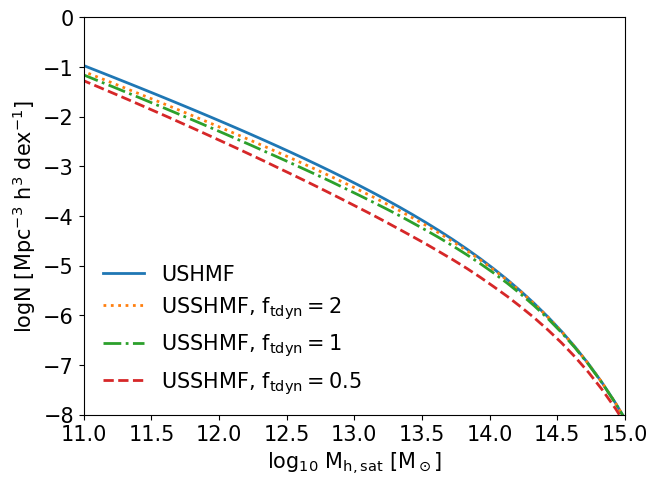

In [7]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update({'font.size': 15})
mpl.rcParams.update({'lines.linewidth': 2})
mpl.rcParams.update({'lines.markersize': 5})
#Subhalomass function parameters macc/M0
Unevolved = {\
'gamma' : 0.22,\
'alpha' : -0.91,\
'beta' : 6,\
'omega' : 3,\
'a' : 1,\
}

Central_Mass = 13.0 #logMsun

uSHMF_Data = np.loadtxt("./Subhalos/Surviving_Subhalosinf.dat")
HaloMassRange_inf = uSHMF_Data[0,1:]
usSHMF_1_Data = np.loadtxt("./Subhalos/Surviving_Subhalos1.0.dat")
HaloMassRange_tdyn_1 = usSHMF_1_Data[0,1:]
usSHMF_pt5_Data = np.loadtxt("./Subhalos/Surviving_Subhalos0.5.dat")
HaloMassRange_tdyn_pt5 = usSHMF_pt5_Data[0,1:]
usSHMF_2_Data = np.loadtxt("./Subhalos/Surviving_Subhalos2.0.dat")
HaloMassRange_tdyn_2 = usSHMF_2_Data[0,1:]



uSHMF = uSHMF_Data[1,1:]
plt.plot(HaloMassRange_inf, np.log10(uSHMF), label = "USHMF")

usSHMF_tdyn_2 = usSHMF_2_Data[1,1:]
plt.plot(HaloMassRange_tdyn_2, np.log10(usSHMF_tdyn_2), ":",label = "USSHMF, $\mathrm{f_{tdyn} = 2}$")

usSHMF_tdyn_1 = usSHMF_1_Data[1,1:]
plt.plot(HaloMassRange_tdyn_1, np.log10(usSHMF_tdyn_1), "-.",label = "USSHMF, $\mathrm{f_{tdyn} = 1}$")

usSHMF_tdyn_pt5 = usSHMF_pt5_Data[1,1:]
plt.plot(HaloMassRange_tdyn_pt5, np.log10(usSHMF_tdyn_pt5), "--",label = "USSHMF, $\mathrm{f_{tdyn} = 0.5}$")


plt.xlim(11, 15)
plt.ylim(-8, 0)
plt.legend(loc = 3, frameon = False)
plt.tight_layout()
plt.xlabel("$\log_{10}$ $\mathrm{M_{h, sat}}$ $\mathrm{[M_\odot]}$")
plt.ylabel('$\log \mathrm{N}$ $\mathrm{[Mpc^{-3}\ h^3\ dex^{-1}]}$')
plt.savefig("./Figures_For_Paper_Final/SHMF.png", bbox_inches='tight')
plt.savefig("./Figures_For_Paper_Final/SHMF.pdf", bbox_inches='tight')
plt.savefig("./Figures_For_Paper_Final/SHMF.eps", bbox_inches='tight')
plt.show()
#F.dn_dlnX(Unevolved,

(191, 66) (191, 66)


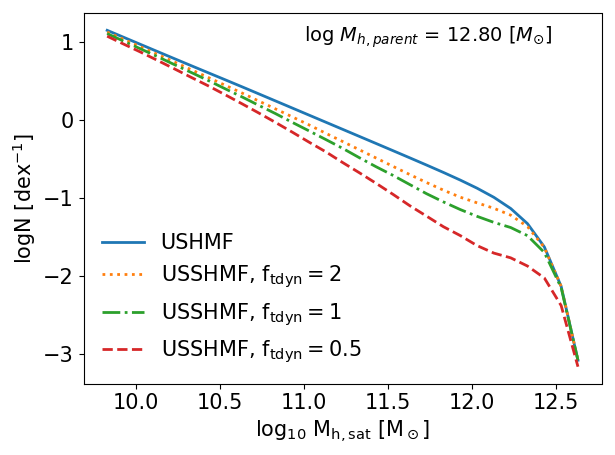

In [8]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update({'font.size': 15})
mpl.rcParams.update({'lines.linewidth': 2})
mpl.rcParams.update({'lines.markersize': 5})
HMF_fun = F.Make_HMF_Interp()
Data_AC = F.LoadData_Mergers((1.0, False, False, True))
Accretion_History, z, AvaHaloMass, Surviving_Sat_SMF_MassRange = Data_AC


#Subhalomass function parameters macc/M0
Unevolved = {\
'gamma' : 0.22,\
'alpha' : -0.91,\
'beta' : 6,\
'omega' : 3,\
'a' : 1,\
}

Central_Mass = 13.0 #logMsun

uSHMF_bp_Data = np.load("./Subhalos/Surviving_Subhalos_ByParentinf.npy")
#HaloMassRange_inf = uSHMF_Data[0,0,1:]
usSHMF_bp_1_Data = np.load("./Subhalos/Surviving_Subhalos_ByParent1.0.npy")
#HaloMassRange_tdyn_1 = usSHMF_1_Data[0,0,1:]
usSHMF_bp_pt5_Data = np.load("./Subhalos/Surviving_Subhalos_ByParent0.5.npy")
#HaloMassRange_tdyn_pt5 = usSHMF_pt5_Data[0,0,1:]
usSHMF_bp_2_Data = np.load("./Subhalos/Surviving_Subhalos_ByParent2.0.npy")
#HaloMassRange_tdyn_2 = usSHMF_2_Data[0,0,1:]
print(np.shape(usSHMF_1_Data), np.shape(uSHMF_Data))


uSHMF = uSHMF_bp_Data[1, 20, 1:]
plt.plot(HaloMassRange_inf[:-1], np.log10(uSHMF) -np.log10(HMF_fun(AvaHaloMass[0][20]+ np.log10(h), z[0])), label = "USHMF")

usSHMF_tdyn_2 = usSHMF_bp_2_Data[1, 20, 1:]
plt.plot(HaloMassRange_tdyn_2[:-1], np.log10(usSHMF_tdyn_2) -np.log10(HMF_fun(AvaHaloMass[0][20]+ np.log10(h), z[0])), ":",label = "USSHMF, $\mathrm{f_{tdyn} = 2}$")

usSHMF_tdyn_1 = usSHMF_bp_1_Data[1, 20, 1:]
plt.plot(HaloMassRange_tdyn_1[:-1], np.log10(usSHMF_tdyn_1) -np.log10(HMF_fun(AvaHaloMass[0][20]+ np.log10(h), z[0])), "-.",label = "USSHMF, $\mathrm{f_{tdyn} = 1}$")

usSHMF_tdyn_pt5 = usSHMF_bp_pt5_Data[1, 20, 1:]
plt.plot(HaloMassRange_tdyn_pt5[:-1], np.log10(usSHMF_tdyn_pt5) -np.log10(HMF_fun(AvaHaloMass[0][20]+ np.log10(h), z[0])), "--",label = "USSHMF, $\mathrm{f_{tdyn} = 0.5}$")


#plt.xlim(11, 15)
plt.text(11.0, 1, "$\log$ $M_{h,parent}$" +" = {0:.2f}".format(AvaHaloMass[0][20])+" $[M_{\odot}]$", fontsize=14)
plt.legend(loc = 3, frameon = False)
plt.xlabel("$\log_{10}$ $\mathrm{M_{h,sat}}$ $\mathrm{[M_\odot]}$")
plt.ylabel('$\log \mathrm{N}$ $\mathrm{[dex^{-1}]}$')
plt.tight_layout()
plt.savefig("./Figures_For_Paper_Final/SHMF_OneCluster.png", bbox_inches='tight')
plt.savefig("./Figures_For_Paper_Final/SHMF_OneCluster.pdf", bbox_inches='tight')
plt.savefig("./Figures_For_Paper_Final/SHMF_OneCluster.eps", bbox_inches='tight')
plt.show()
#F.dn_dlnX(Unevolved,

Tdyn againstM star

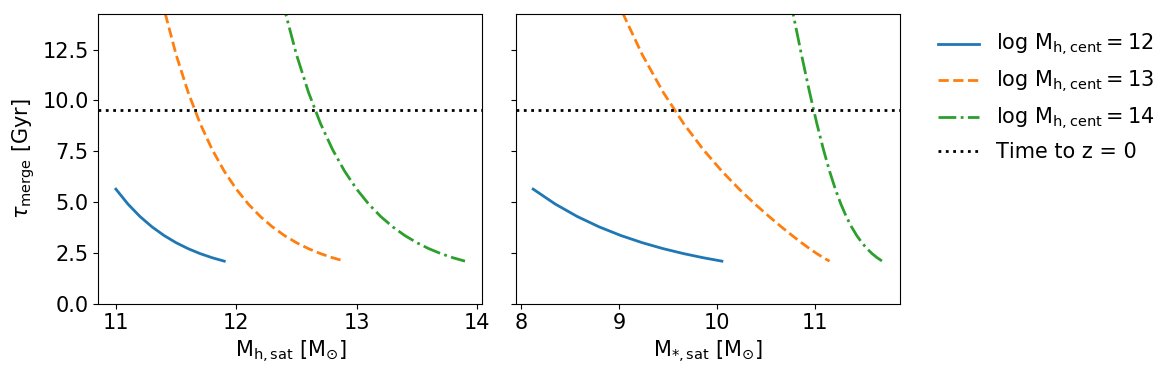

In [12]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update({'font.size': 15})
mpl.rcParams.update({'lines.linewidth': 2})
mpl.rcParams.update({'lines.markersize': 5})
f, SubPlots = plt.subplots(1, 2, figsize = (12,4), sharey = True)

z_infall = 1.5

lines = ["-", "--","-.", ":"]
linecycler = cycle(lines)

for M_cent in [12,13,14]:
    Satellites_Mhalo = np.arange(11.0, M_cent, 0.1)
    Satellites_Mstar = F.DarkMatterToStellarMass(Satellites_Mhalo, z_infall, Paramaters)

    m_X_tdyn = F.DynamicalFriction(M_cent, Satellites_Mhalo, z_infall, Paramaters)
    linestyle_ = next(linecycler)   
    SubPlots[0].plot(Satellites_Mhalo, m_X_tdyn, label = "$\log$ $\mathrm{M_{h,cent}} = $"+ str(M_cent), linestyle =linestyle_)
    SubPlots[1].plot(Satellites_Mstar, m_X_tdyn, label = "$\log$ $\mathrm{M_{h,cent}} = $"+ str(M_cent), linestyle =linestyle_)


SubPlots[0].axhline(y = Cosmo.lookbackTime(z_infall), color = "k", linestyle = ":", label = "Time to z = 0")
SubPlots[1].axhline(y = Cosmo.lookbackTime(z_infall), color = "k", linestyle = ":", label = "Time to z = 0")

SubPlots[0].set_ylabel(r"$\tau_{\mathrm{merge}}$ $[\mathrm{Gyr}]}$")
SubPlots[0].set_xlabel("$\mathrm{M_{h,sat}}$ $\mathrm{[M_{\odot}]}$")
SubPlots[1].set_xlabel("$\mathrm{M_{*,sat}}$ $\mathrm{[M_{\odot}]}$")

plt.ylim(0,Cosmo.lookbackTime(z_infall)*1.5)
SubPlots[1].legend(frameon = False, bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.savefig("./Figures_For_Paper_Final/Tdyn_M.png", bbox_inches='tight')
plt.savefig("./Figures_For_Paper_Final/Tdyn_M.pdf", bbox_inches='tight')
plt.savefig("./Figures_For_Paper_Final/Tdyn_M.eps", bbox_inches='tight')
plt.show()